<a href="https://colab.research.google.com/github/tjdux/basic_of_ml/blob/main/27_%EA%B0%95%EC%95%84%EC%A7%80%EC%99%80_%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%82%AC%EC%A7%84_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## VGGNet 모델 로드하기
- 모델 가중치까지 포함됨
- **사전 훈련**: 구체적인 작업에 딥러닝 모델을 적용하기 전에 대규모 데이터셋에서 일반적인 특성을 학습하는 과정

In [1]:
import keras

vggnet = keras.applications.VGG16()
#이미지넷 데이터셋으로 사전 훈련된 가중치 로드

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
!gdown 1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
!unzip cat-dog-images.zip

Downloading...
From: https://drive.google.com/uc?id=1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
To: /content/cat-dog-images.zip
100% 182k/182k [00:00<00:00, 5.47MB/s]
Archive:  cat-dog-images.zip
   creating: images/
  inflating: images/dog.png          
  inflating: images/cat.png          


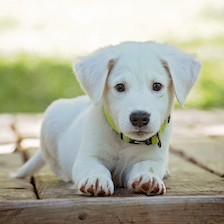

In [3]:
from PIL import Image

dog_png = Image.open('images/dog.png')
display(dog_png)

In [4]:
import numpy as np

dog_array = np.array(dog_png)
dog_array.shape

(224, 224, 3)

## 강아지와 고양이 사진 분류하기
- **이미지 전처리**: 사전 훈련된 CNN 모델을 사용해 예측을 만들기 전에 수행해야 하는 필수 작업

### 강아지 사진 분류하기
- VGGNet: RGB 채널을 BGR로 순서 바꾸기 ➡️ 채널 평균값인 `(103.939, 116.779, 123.68)`를 빼는 전처리 과정

In [5]:
from keras.applications import vgg16

# 전처리
vgg_prep_dog = vgg16.preprocess_input(dog_array)

In [6]:
predictions = vggnet.predict(vgg_prep_dog[np.newaxis, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [7]:
# 1000개의 클래스에 대한 확률값
max_index = np.argmax(predictions[0])
print(max_index, predictions[0][max_index])

208 0.35698095


### 모델 출력 디코딩하기

In [8]:
import requests

url = 'https://storage.googleapis.com/download.tensorflow.org/' + \
      'data/imagenet_class_index.json'
json_data = requests.get(url).json()

json_data[str(max_index)]

['n02099712', 'Labrador_retriever']

In [9]:
vgg16.decode_predictions(predictions)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02099712', 'Labrador_retriever', np.float32(0.35698095)),
  ('n02099601', 'golden_retriever', np.float32(0.14486553)),
  ('n02104029', 'kuvasz', np.float32(0.09278709)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.069169864)),
  ('n02106166', 'Border_collie', np.float32(0.056728862))]]

In [10]:
vgg16.decode_predictions(predictions, top=1)

[[('n02099712', 'Labrador_retriever', np.float32(0.35698095))]]

### 고양이 사진 분류하기

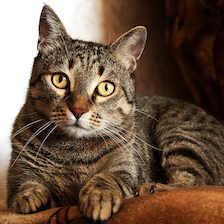

In [11]:
cat_png = Image.open('images/cat.png')
display(cat_png)

In [12]:
vgg_prep_cat = vgg16.preprocess_input(np.array(cat_png))

predictions = vggnet.predict(vgg_prep_cat[np.newaxis, :])
vgg16.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


[[('n02123045', 'tabby', np.float32(0.43275443)),
  ('n02124075', 'Egyptian_cat', np.float32(0.31127918)),
  ('n02123159', 'tiger_cat', np.float32(0.21606451)),
  ('n02971356', 'carton', np.float32(0.0035795602)),
  ('n03223299', 'doormat', np.float32(0.0031308173))]]